In [1]:
import numpy as np
import glob2 as glob
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

AVERAGING_SIZE = 20

In [2]:
def load_data(data_path, averaging_size=AVERAGING_SIZE):
    file_names = glob.glob(data_path)
    data = []
    for file_name in file_names:
        data_for_file = np.load(file_name)
        data.append(data_for_file)
    data = np.concatenate(data, axis=1)
    reduced_data = np.empty((data.shape[0], int(data.shape[1] / averaging_size)))
    for k in range(0, int(data.shape[1] / averaging_size) * averaging_size, averaging_size):
        reduced_data[:, int(k / averaging_size)] = data[:, k:k + averaging_size].mean(axis=1)
    return reduced_data
    

C:\Users\david.bell\AppData\Local\Temp\ipykernel_3288\1249267271.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs.scatter(s, pr_disc, c=cmap(reward_param / 30))


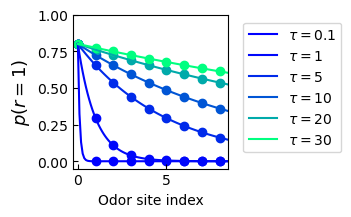

In [5]:
scale = 0.5
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))
axs.tick_params(axis='both', direction='in')

cmap = mpl.colormaps['winter']

s = np.arange(0, 9)
x = np.linspace(0, 9, 100)
a = 0.8

for i, reward_param in enumerate([0.1, 1, 5, 10, 20, 30]):
    pr_disc = a * np.exp(-s/reward_param)
    pr_cont = a * np.exp(-x/reward_param)
    axs.plot(x, pr_cont, label=r'$\tau = $' + f'{reward_param}', c=cmap(reward_param / 30))
    axs.scatter(s, pr_disc, c=cmap(reward_param / 30))

axs.set_ylabel(r'$p(r=1)$', fontsize=13)
axs.set_xlabel('Odor site index')
axs.set_xlim(-0.25, 8.5)
axs.set_ylim(-0.05, 1)
fig.legend(bbox_to_anchor=(1.5, 0.875))



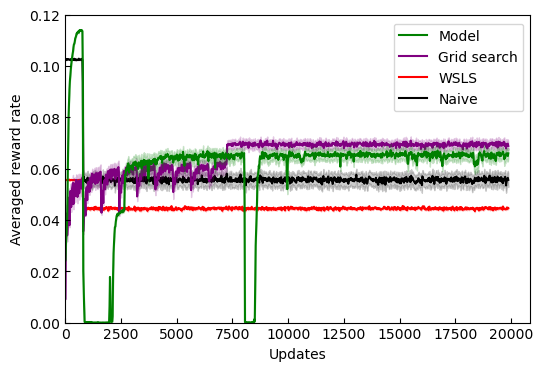

In [157]:
data_dir = '../data/rl_agent_outputs/det_reward_to_stoch_long_trials_max_reward_decay_30_2024-08-29_17_06_50_928811/reward_rates'
reduced_data = load_data(os.path.join(data_dir, '*.npy'))

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.fill_between(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1),
    c='green',
    zorder=1,
    label='Model',
)

opt_data_dir = '../data/grid_search_agent_outputs/expect_reward_to_stoch_long_trials_max_reward_decay_30_2024-08-30_12_32_24_721439/reward_rates'
averaging_size = AVERAGING_SIZE
reduced_data = load_data(os.path.join(opt_data_dir, '*.npy'), averaging_size=averaging_size)

axs.fill_between(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='purple',
    alpha=0.2,
    zorder=0,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1),
    c='purple',
    zorder=0,
    label='Grid search',
)

# opt_data_dir = '../data/grid_search_agent_outputs/expect_reward_to_stoch_sample_period_25_2024-08-30_13_34_33_910423/reward_rates'
# averaging_size = AVERAGING_SIZE
# reduced_data = load_data(os.path.join(opt_data_dir, '*.npy'), averaging_size=averaging_size)

# axs.fill_between(
#     np.arange(reduced_data.shape[1]) * averaging_size,
#     np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1),
#     np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1),
#     color='red',
#     alpha=0.2,
#     zorder=0,
# )

# axs.plot(
#     np.arange(reduced_data.shape[1]) * averaging_size,
#     np.mean(reduced_data.T, axis=1),
#     c='red',
#     zorder=0,
# )

wsls_data_dir = '../data/wsls_agent_outputs/det_reward_to_stoch_2024-08-30_14_41_19_146891/reward_rates'
averaging_size = AVERAGING_SIZE
reduced_data = load_data(os.path.join(wsls_data_dir, '*.npy'), averaging_size=averaging_size)

axs.fill_between(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='red',
    alpha=0.2,
    zorder=-1,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1),
    c='red',
    zorder=-1,
    label='WSLS',
)

ctrl_data_dir = '../data/naive_agent_outputs/det_reward_to_stoch_2024-08-30_15_11_25_031678/reward_rates'
averaging_size = AVERAGING_SIZE
reduced_data = load_data(os.path.join(ctrl_data_dir, '*.npy'), averaging_size=averaging_size)

axs.fill_between(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='black',
    alpha=0.2,
    zorder=-2,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1),
    c='black',
    zorder=-2,
    label='Naive',
)

axs.set_ylim(0, 0.12)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(0.9, 0.875))
print()

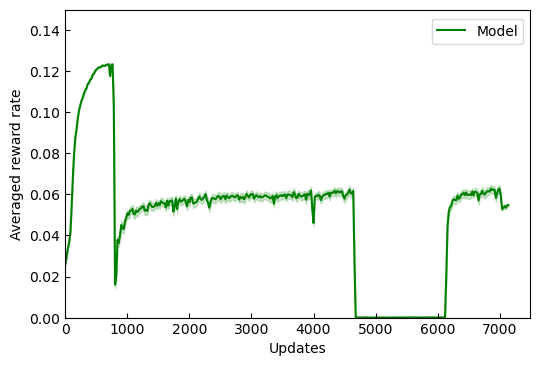

In [162]:
data_dir = '../data/rl_agent_outputs/det_reward_to_stoch_100_sites_per_p_max_reward_decay_30_2024-09-12_11_20_11_328929/reward_rates'
reduced_data = load_data(os.path.join(data_dir, '*.npy'))

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.fill_between(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1),
    c='green',
    zorder=1,
    label='Model',
)

axs.set_ylim(0, 0.15)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(0.9, 0.875))
print()

0.00709141875256463



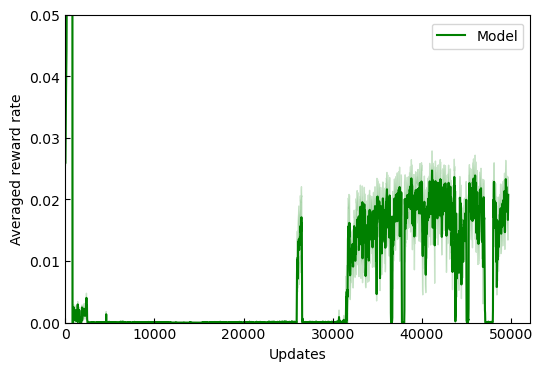

In [22]:
data_dir = '../data/rl_agent_outputs/3_distinct_levels_penalty_for_incorrect_50k_2024-10-12_09_17_28_176821_var_noise_0_activity_weight_0/reward_rates'
reduced_data = load_data(os.path.join(data_dir, '*.npy'))

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.fill_between(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1),
    c='green',
    zorder=1,
    label='Model',
)

print( np.mean(reduced_data.T, axis=1)[:-50:].mean())

axs.set_ylim(0, 0.05)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(0.9, 0.875))
print()

0.014711090909090913



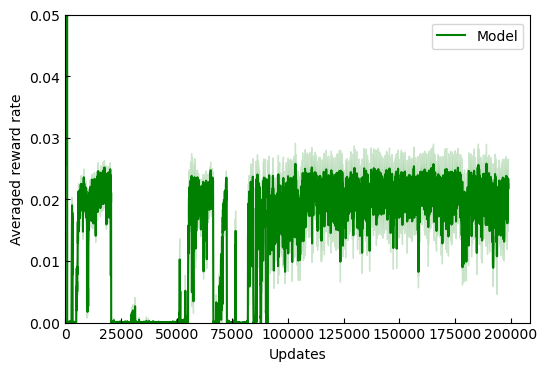

In [44]:
data_dir = '../data/rl_agent_outputs/punish_no_reward_200k_2024-10-14_12_07_40_801312_var_noise_0_activity_weight_0/reward_rates'
reduced_data = load_data(os.path.join(data_dir, '*.npy'))

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.fill_between(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1),
    c='green',
    zorder=1,
    label='Model',
)

print( np.mean(reduced_data.T, axis=1)[:-50:].mean())

axs.set_ylim(0, 0.05)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(0.9, 0.875))
print()